In [1]:
import os
import sys

import pandas as pd
import numpy as np
import math

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(1,4) # [,1,2]
    for i in pq_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,0,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, 0, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: %6.5f | order: %s'%(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [3]:
df = pd.read_csv("AlphaMergedV2.csv")  

df2 = df[df['name'] == 'CAR']
close = df2.close
time = df2.timestamp
df2 = pd.concat([close, time], axis = 1)

df2.set_index('timestamp', inplace = True)
close = df2.iloc[::-1]
close.head()

,close
timestamp,
1998-01-23,34.69
1998-01-26,34.31
1998-01-27,33.44
1998-01-28,33.31
1998-01-29,33.69


In [4]:
# log returns
lrets = np.log(close['close']/close['close'].shift(1)).fillna(0)
lrets.head()

timestamp
1998-01-23    0.000000
1998-01-26   -0.011015
1998-01-27   -0.025684
1998-01-28   -0.003895
1998-01-29    0.011343
Name: close, dtype: float64

In [5]:
print(lrets[5268:5270])  # 2019 Jan starts from index 5269, ends at index 5289, step 21

print(lrets[5290:5292])   # 2019 Feb starts from index 5290, ends at index 5308, step 19

print(lrets[5309:5311])   # 2019 Mar starts from index 5309, ends at index 5329, step 21
print(lrets[5329:5331])  

timestamp
2018-12-31   -0.046500
2019-01-02    0.010179
Name: close, dtype: float64
timestamp
2019-02-01   -0.001127
2019-02-04   -0.008302
Name: close, dtype: float64
timestamp
2019-03-01    0.012760
2019-03-04    0.005498
Name: close, dtype: float64
timestamp
2019-03-29    0.017653
2019-04-01    0.025490
Name: close, dtype: float64


In [6]:
JanS = 5269
JanE = 5289

FebS = 5290
FebE = 5308

MarS = 5309
MarE = 5329

# Jan

In [7]:
# predict for 2019 Jan
TS1 = lrets[1:JanS]    # change index

res_tup = _get_best_model(TS1)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -15065.58639 | order: (3, 0, 2)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: over

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,...,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915,0.015915


In [8]:
preJan = 0*lrets[JanS:JanE+1]
for d in range(len(preJan)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preJan.iloc[d] = out.mean[colname].iloc[-1]

In [9]:
retsJan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
retsJan['Real value'] = lrets[JanS:JanE+1]
retsJan['Prediction'] = preJan 

Jan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
Jan['Real value']=retsJan['Real value'].cumsum()
Jan['Prediction'] = retsJan['Prediction'].cumsum()

JanReverse = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
JanReverse['Real value'] = Jan['Real value'] + np.log(close[JanS - 1:JanS])['close'].iloc[0] # add log of real value of 2018/12/31
JanReverse['Prediction'] = Jan['Prediction'] + np.log(close[JanS - 1:JanS])['close'].iloc[0]

for d in range(len(preJan)):
    JanReverse['Real value'].iloc[d] = math.exp( JanReverse['Real value'].iloc[d] )  # reverse log
    JanReverse['Prediction'].iloc[d] = math.exp( JanReverse['Prediction'].iloc[d] )
    
JanReverse

,Real value,Prediction
timestamp,,
2019-01-02,22.71,22.840629
2019-01-03,21.78,23.207044
2019-01-04,23.13,23.579337
2019-01-07,23.93,23.957602
2019-01-08,24.11,24.341935
2019-01-09,25.06,24.732434
2019-01-10,25.57,25.129197
2019-01-11,26.01,25.532325
2019-01-14,26.04,25.941921


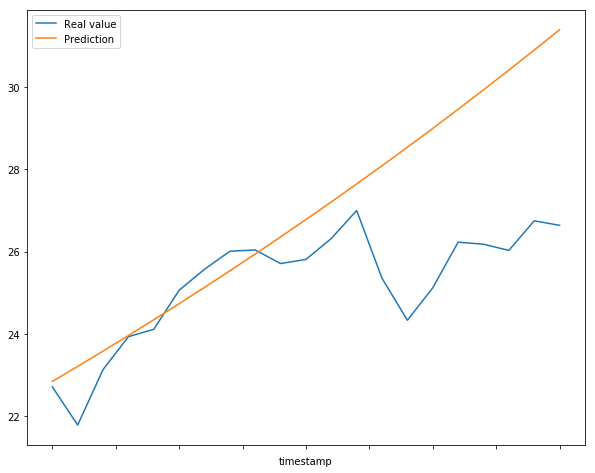

In [10]:
JanReverse['Real value'].plot(figsize=(10,8))
JanReverse['Prediction'].plot()
plt.legend()
plt.show()

# Feb

In [11]:
# predict for 2019 Feb
TS2 = lrets[1:FebS]    # change index

res_tup = _get_best_model(TS2)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=19, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -15140.35975 | order: (3, 0, 3)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024,-0.00024


In [12]:
preFeb = 0*lrets[FebS:FebE+1]
for d in range(len(preFeb)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preFeb.iloc[d] = out.mean[colname].iloc[-1]

In [13]:
retsFeb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
retsFeb['Real value'] = lrets[FebS:FebE+1]
retsFeb['Prediction'] = preFeb

Feb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
Feb['Real value']=retsFeb['Real value'].cumsum()
Feb['Prediction'] = retsFeb['Prediction'].cumsum()

FebReverse = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
FebReverse['Real value'] = Feb['Real value'] + np.log(close[FebS-1:FebS])['close'].iloc[0] # add log of real value at 2018/12/31
FebReverse['Prediction'] = Feb['Prediction'] + np.log(close[FebS-1:FebS])['close'].iloc[0]

for d in range(len(preFeb)):
    FebReverse['Real value'].iloc[d] = math.exp( FebReverse['Real value'].iloc[d] )  # reverse log
    FebReverse['Prediction'].iloc[d] = math.exp( FebReverse['Prediction'].iloc[d] )
    
FebReverse

,Real value,Prediction
timestamp,,
2019-02-01,26.61,26.633612
2019-02-04,26.39,26.627225
2019-02-05,26.68,26.620839
2019-02-06,26.54,26.614456
2019-02-07,26.12,26.608073
2019-02-08,25.68,26.601693
2019-02-11,27.58,26.595313
2019-02-12,27.61,26.588936
2019-02-13,27.52,26.582560


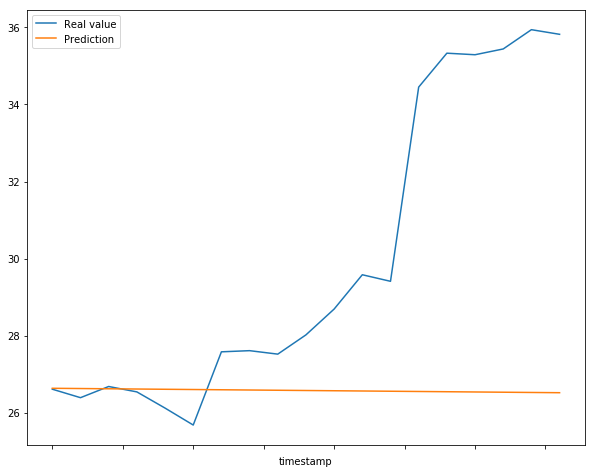

In [14]:
FebReverse['Real value'].plot(figsize=(10,8))
FebReverse['Prediction'].plot()
plt.legend()
plt.show()

# Mar

In [15]:
# predict for 2019 Mar
TS3 = lrets[1:MarS]    # change index

res_tup = _get_best_model(TS3)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-

aic: -15204.09346 | order: (3, 0, 3)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,...,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383


In [16]:
preMar = 0*lrets[MarS:MarE+1]
for d in range(len(preMar)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preMar.iloc[d] = out.mean[colname].iloc[-1]

In [17]:
retsMar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
retsMar['Real value'] = lrets[MarS:MarE+1]
retsMar['Prediction'] = preMar 

Mar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
Mar['Real value']=retsMar['Real value'].cumsum()
Mar['Prediction'] = retsMar['Prediction'].cumsum()

MarReverse = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
MarReverse['Real value'] = Mar['Real value'] + np.log(close[MarS-1:MarS])['close'].iloc[0] # add log of real value at 2018/12/31
MarReverse['Prediction'] = Mar['Prediction'] + np.log(close[MarS-1:MarS])['close'].iloc[0]

for d in range(len(preMar)):
    MarReverse['Real value'].iloc[d] = math.exp( MarReverse['Real value'].iloc[d] )  # reverse log
    MarReverse['Prediction'].iloc[d] = math.exp( MarReverse['Prediction'].iloc[d] )
    
MarReverse

,Real value,Prediction
timestamp,,
2019-03-01,36.28,35.833704
2019-03-04,36.48,35.847414
2019-03-05,35.56,35.861129
2019-03-06,34.96,35.874849
2019-03-07,34.55,35.888575
2019-03-08,34.28,35.902305
2019-03-11,34.30,35.916041
2019-03-12,34.56,35.929782
2019-03-13,34.92,35.943529


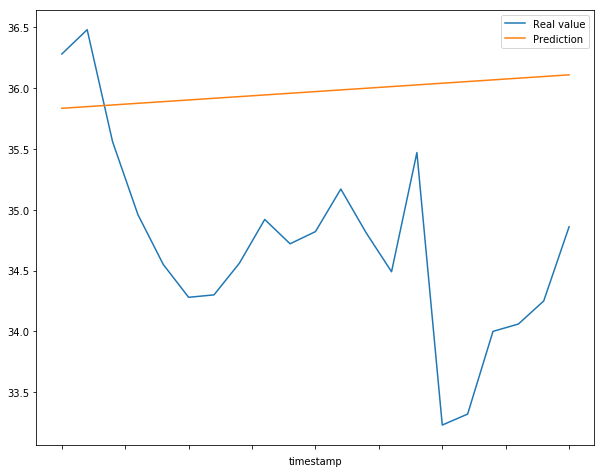

In [18]:
MarReverse['Real value'].plot(figsize=(10,8))
MarReverse['Prediction'].plot()
plt.legend()
plt.show()

# Combine Dataframes of 3 months

In [19]:
CAR = pd.concat([JanReverse, FebReverse, MarReverse])
CAR.columns = ['CAR real value', 'CAR prediction']
CAR.to_csv('CAR_pred.csv')